## Cat and Mouse
A mouse starts at position (0,0) and runs with velocity 1 towards the mouse-hole atposition (0,1).  A cat starts from position (1,0), and runs with velocity 2 into thedirection of the mouse.  Does the cat reach its meal, and if so - when and where? Derive an ODE for the path of the cat, and solve it by a method of your choice.

<img src="cat_mouse.PNG">

Two state variables: x, y position of cat

$ x_m = 0$

$ y_m = t$

$ \frac{dx_c}{dt} = 2 \frac{-x_c}{\sqrt{x_c^2+(y_c-y_m)^2}} $

$ \frac{dy_c}{dt} = 2 \frac{y_m - y_c}{\sqrt{x_c^2+(y_c-y_m)^2}} $

In [58]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def rhs_cat_mouse(t, y, v_m, v_c):
    xc, yc = y
    
    ym = v_m*t
    
    s = np.sqrt(xc**2 + (yc - ym)**2)
    
    dxc_dt = v_c * -xc/s
    dyc_dt = v_c * (ym - yc)/s
    
    return [dxc_dt, dyc_dt]


def got_mouse(t, y, v_m, v_c):
    xc, yc = y
    ym = v_m*t
    
    return np.sqrt(xc**2 + (yc - ym)**2) - 0.001

got_mouse.terminal = True
    

sol = solve_ivp(rhs_cat_mouse, [0, 1], [1, 0], args=(1, 2), dense_output=True, events=got_mouse)
t = np.linspace(0, sol.t_events[0][0], 200)
z = sol.sol(t)

xc, yc = z

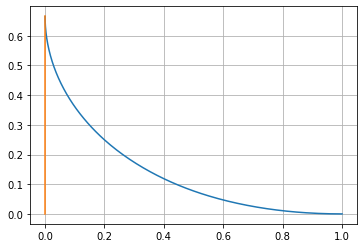

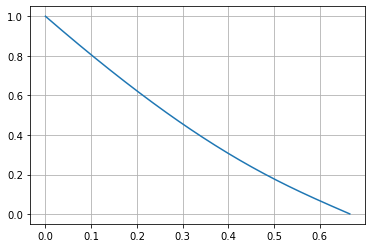

In [59]:
plt.figure()
ax = plt.gca()
ax.set_aspect('equal')
ax.grid()
plt.plot(xc, yc)
ym = t*1
plt.plot(np.zeros(ym.shape), ym)

plt.figure()
s = np.sqrt(xc**2 + (yc - ym)**2)
plt.plot(t, s)
plt.grid()


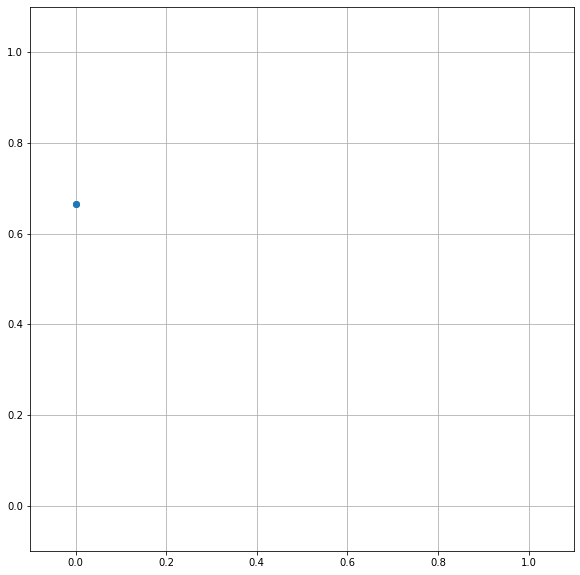

In [61]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o', lw=2)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, xc[i]]
    thisy = [ym[i], yc[i]]

    line.set_data(thisx, thisy)
    
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, 
                               blit=True)

HTML(anim.to_jshtml())

In [54]:
print(sol.t_events[0][0])

0.6655255555300736
